In [3]:
import pandas as pd

In [107]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to read and clean data from a given CSV file
def read_and_clean_data_updated(file_path):
    """
    Reads a CSV file, extracts the 'Mass' column, and cleans it by removing 'Na', NaN, non-numeric, and empty values.

    Parameters:
    file_path (str): The path to the CSV file.

    Returns:
    pandas.Series: A cleaned Series of the 'Mass' column with only numeric values.
    """
    data = pd.read_csv(file_path)
    mass_column = pd.to_numeric(data['Mass'], errors='coerce').dropna()
    mass_column_cleaned = mass_column[mass_column < 2000]  # Keep values smaller than 2000
    return mass_column_cleaned



def plot_mass_distributions(data_list, labels):
    """
    Plots the distribution of Mass data for each Series in the data_list using Seaborn's displot.

    Parameters:
    data_list (list): A list of pandas.Series containing cleaned Mass data.
    labels (list): A list of strings representing labels for each Series in data_list.
    """
    combined_data = pd.DataFrame()
    for i, mass_data in enumerate(data_list):
        temp_df = pd.DataFrame(mass_data)
        temp_df['Label'] = labels[i]
        combined_data = pd.concat([combined_data, temp_df])

    # Plot the distribution with y-axis as percent
    g = sns.displot(combined_data, x="Mass", hue="Label", kind="kde", height=4, aspect=1.8, fill=True)
    g.set(ylabel='Density (%)')
    for ax in g.axes.flat:
            ax.set_yticklabels([])  # Remove y-axis tick labels
    plt.title('Distribution of Mass')
    plt.show()



def plot_mass_distributions_overlay(data_list, labels):
    """
    Overlays the KDE distribution of Mass data for each Series in the data_list using Seaborn's displot,
    with y-axis values removed.

    Parameters:
    data_list (list): A list of pandas.Series containing cleaned Mass data.
    labels (list): A list of strings representing labels for each Series in data_list.
    """
    plt.figure(figsize=(10, 6)) 
    for mass_data, label in zip(data_list, labels):
        sns.kdeplot(mass_data, fill=True, label=label)
    plt.title('Distribution of Mass (Scaling)')
    plt.xlabel('Mass')
    plt.ylabel('Density')
    plt.yticks([])  # Remove y-axis tick labels
    plt.legend()
    
    ax = plt.gca()  # Get current axis
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.show()


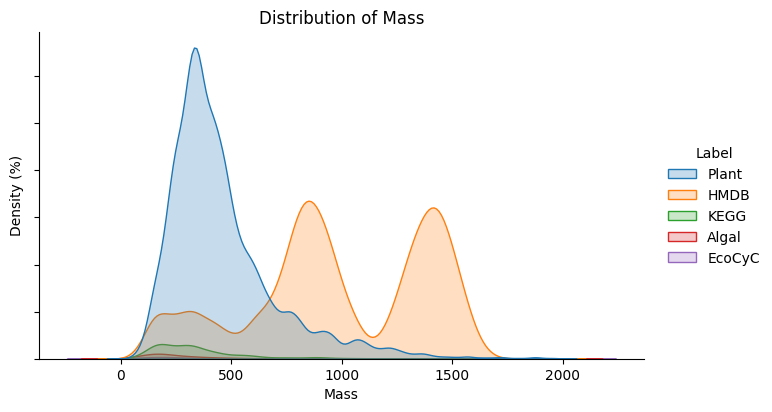

In [108]:
algal = read_and_clean_data_updated("/Users/bowen/Desktop/MCID2.0/01_source_data/microbe/Algal.csv")
ecocyc = read_and_clean_data_updated("/Users/bowen/Desktop/MCID2.0/01_source_data/microbe/EcoCyc.csv")
hmdb = read_and_clean_data_updated("/Users/bowen/Desktop/MCID2.0/database/hmdb.csv")
kegg = read_and_clean_data_updated("/Users/bowen/Desktop/MCID2.0/database/0Rxn_11157.csv")
plant = read_and_clean_data_updated("/Users/bowen/Desktop/MCID2.0/database/mcidxplant_0rxn.csv")




plot_mass_distributions([plant, hmdb, kegg, algal, ecocyc], ["Plant", "HMDB", "KEGG", "Algal", "EcoCyC"])


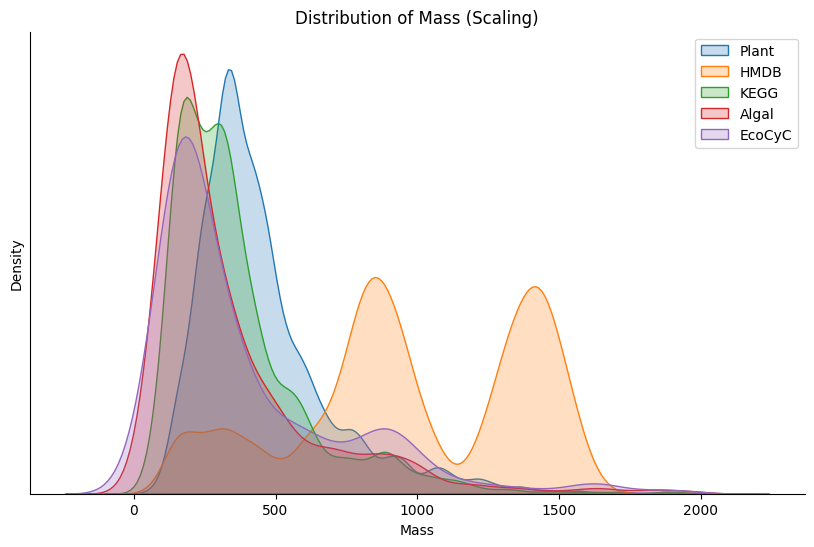

In [109]:
plot_mass_distributions_overlay([plant, hmdb, kegg, algal, ecocyc], ["Plant", "HMDB", "KEGG", "Algal", "EcoCyC"])